In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as mfm
from matplotlib.patches import Rectangle, Circle, PathPatch, Arc, FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D, proj3d

np.set_printoptions(precision=4, linewidth=150)

mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']

style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

In [2]:
def arrowed_spines(fig, ax, remove_ticks=False):
    """
    https://stackoverflow.com/questions/33737736/matplotlib-axis-arrow-tip
    """
    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    if remove_ticks == True: 
        # removing the axis ticks
        plt.xticks([]) # labels 
        plt.yticks([])
        ax.xaxis.set_ticks_position('none') # tick markers
        ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./50.*(ymax-ymin) 
    hl = 1./25.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.4 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, #overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, #overhang = ohg, 
             length_includes_head= True, clip_on = False)

In [3]:
class Arrow3D(FancyArrowPatch):
    """
    https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
    """
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

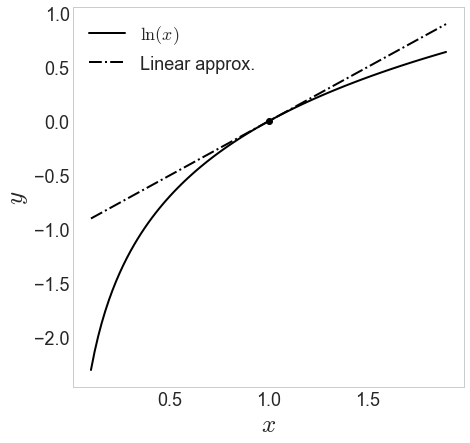

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

f = lambda x: np.log(x)
df = lambda x: 1/x

x = np.linspace(0.1, 1.9, 100)

x0 = 1
L = lambda x: f(x0)+df(x0)*(x-x0)

ax.plot(x, f(x), color='k',  label=r"$\ln(x)$")
ax.plot(x, L(x), '-.', color='k', label="Linear approx.")
ax.plot(1, 0, 'o', color='k')

ax.legend(fontsize=18)

plt.show()

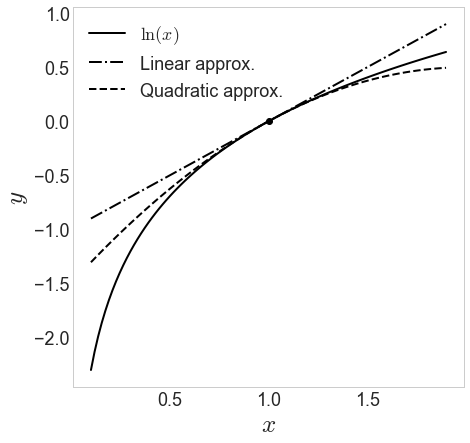

f(1.5)=0.405465, L(1.5)=0.500000, Q(1.5)=0.375000


In [6]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

f = lambda x: np.log(x)
df = lambda x: 1/x
df2 = lambda x: -1/x**2

x = np.linspace(0.1, 1.9, 100)

x0 = 1
Q = lambda x: f(x0)+df(x0)*(x-x0)+(1/2)*df2(x0)*(x-x0)**2

ax.plot(x, f(x), color='k', label=r"$\ln(x)$")
ax.plot(x, L(x), '-.', color='k', label="Linear approx.")
ax.plot(x, Q(x), '--', color='k', label="Quadratic approx.")
ax.plot(1, 0, 'o', color='k')
ax.legend(fontsize=18)

plt.show()

print( "f(1.5)={:.6f}, L(1.5)={:.6f}, Q(1.5)={:.6f}".format(f(1.5), L(1.5), Q(1.5)) )

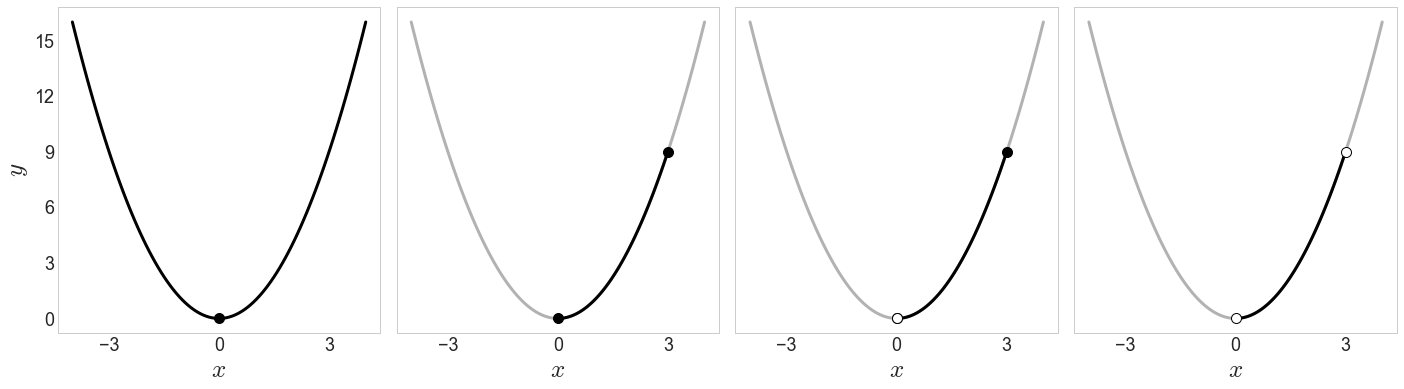

In [7]:
x = np.linspace(-4, 4, 100)
x2 = np.linspace(0, 3, 100)
y = x**2
y2 = x2**2

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey=True)
fig.set_size_inches(24,6)

x_ticks = (-3, 0, 3)
y_ticks = (0, 3, 6, 9, 12, 15)

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)
ax1.plot(x, y, lw=3, color='k')
ax1.plot(0, 0, 'o',   color='k', markersize=10)
#ax1.set_title(r'$D=(-\infty, \infty)$에서 전역 최대만 존재', fontproperties=fontprop)
ax1.set_xticks(x_ticks)
ax1.set_yticks(y_ticks)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)
ax2.plot(x, y, lw=3, color='k', alpha=0.3)
ax2.plot(x2, y2, lw=3, color='k')
ax2.plot(0, 0, 'o',   color='k', markersize=10)
ax2.plot(3, 9, 'o',   color='k', markersize=10)
#ax2.set_title(r'$D=[0,3]$에서 전역 최대, 최소 존재', fontproperties=fontprop)
ax2.set_xticks(x_ticks)
ax2.set_yticks(y_ticks)

ax3.xaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)
ax3.set_xlabel('$x$', fontsize=25)
ax3.set_ylabel('$y$', fontsize=25)
ax3.grid(False)
ax3.plot(x, y, lw=3, color='k', alpha=0.3)
ax3.plot(x2, y2, lw=3, color='k')
ax3.plot(0, 0, 'o', color='k', markersize=10, fillstyle='none')
ax3.plot(0, 0, 'o', markersize=10, markerfacecolor='w',
         markeredgewidth=1, markeredgecolor='k')
ax3.plot(3, 9, 'o',   color='k', markersize=10)
#ax3.set_title(r'$D=(0,3]$ 전역 최대만 존재', fontproperties=fontprop)
ax3.set_xticks(x_ticks)
ax3.set_yticks(y_ticks)

ax4.xaxis.set_tick_params(labelsize=18)
ax4.yaxis.set_tick_params(labelsize=18)
ax4.set_xlabel('$x$', fontsize=25)
ax4.set_ylabel('$y$', fontsize=25)
ax4.grid(False)
ax4.plot(x, y, lw=3, color='k', alpha=0.3)
ax4.plot(x2, y2, lw=3, color='k')
ax4.plot(0, 0, 'o', markersize=10, markerfacecolor='w',
         markeredgewidth=1, markeredgecolor='k')
ax4.plot(3, 9, 'o', markersize=10, markerfacecolor='w',
         markeredgewidth=1, markeredgecolor='k')
#ax4.set_title(r'$D=(0,3)$ 전역 최대 없음, 최소 없음', fontproperties=fontprop)
ax4.set_xticks(x_ticks)
ax4.set_yticks(y_ticks)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax_ in [ax1, ax2, ax3, ax4]:
    ax_.label_outer()
    
plt.subplots_adjust(hspace=0.05, wspace=0.05)

plt.show()

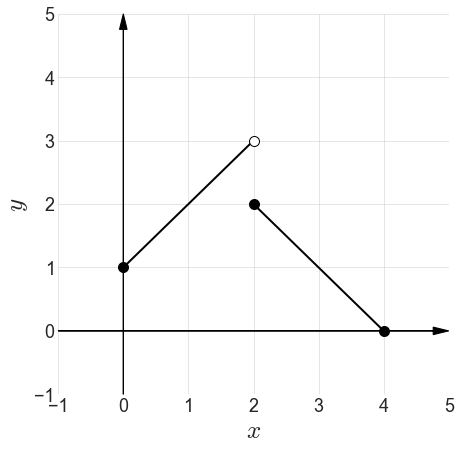

In [8]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

f1 = lambda x : x+1
f2 = lambda x : -(x-4)

x1 = np.linspace(0, 2, 100)
x2 = np.linspace(2, 4, 100)

ax.plot(x1, f1(x1), color='k')
ax.plot(0, 1, 'o',   color='k', markersize=10)
ax.plot(2, 3, 'o', markersize=10, markerfacecolor='w',
         markeredgewidth=1, markeredgecolor='k')

ax.plot(x2, f2(x2), color='k')
ax.plot(2, 2, 'o',   color='k', markersize=10)
ax.plot(4, 0, 'o',   color='k', markersize=10)
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])

arrowed_spines(fig, ax)


plt.show()

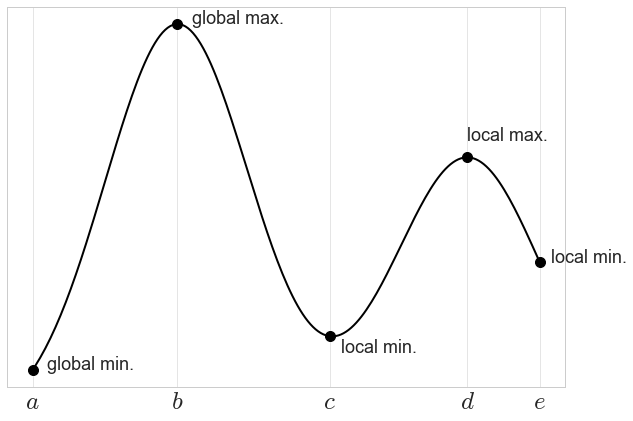

In [10]:
def N(x, mu, var):
    return 1/np.sqrt(2*np.pi*var) * np.exp( -(x-mu)**2/(2*var) )

def C_prior(c, mu_c):
    return mu_c**c * (1-mu_c)**(1-c)

def J(x, c):
    """
    P(C,X)
    """
    #return (C_marginal[1]*N(x, 3, 0.5))**c * (C_marginal[0]*N(x, 0, 1))**(1-c)
    return (C_prior(1, mu_c)*N(x, 3, 1.0))**c * (C_prior(0, mu_c)*N(x, -1, 1.0))**(1-c)

def X_marginal(x):
    """
    P(X) = P(X,C=0) + P(X,C=1)
    """
    return J(x, 0) + J(x, 1)

x = np.linspace(-3, 4, 200)
mu_c = 0.4

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
# ax.set_xlabel('$x$', fontsize=25)
# ax.set_ylabel('$y$', fontsize=25)

y = X_marginal(x)
ax.plot(x, y, color='k')

x_ticks = (-3, -1, 1+(1/4)*np.log(6/4), 3, 4)
x_ticklabels = (r'$a$', r'$b$', r'$c$', r'$d$', r'$e$')
texts = ({'dx':0.2, 'dy':0.0, 'text':'global min.'}, {'dx':0.2, 'dy':0.0, 'text':'global max.'}, 
         {'dx':0.15, 'dy':-0.01, 'text':'local min.'}, {'dx':0.0, 'dy':0.01, 'text':'local max.'}, 
         {'dx':0.15, 'dy':0.0, 'text':'local min.'})


for i, x_tick in enumerate(x_ticks):
    ax.plot(x_tick, X_marginal(x_tick), 'o', color='k', markersize=10,)
    ax.text(x_tick+texts[i]['dx'], X_marginal(x_tick)+texts[i]['dy'], 
            texts[i]['text'], fontsize=18)
    
ax.set_yticks([])
ax.set_xticks(x_ticks)
ax.set_xticklabels( x_ticklabels, fontsize=25 )

   
plt.show()

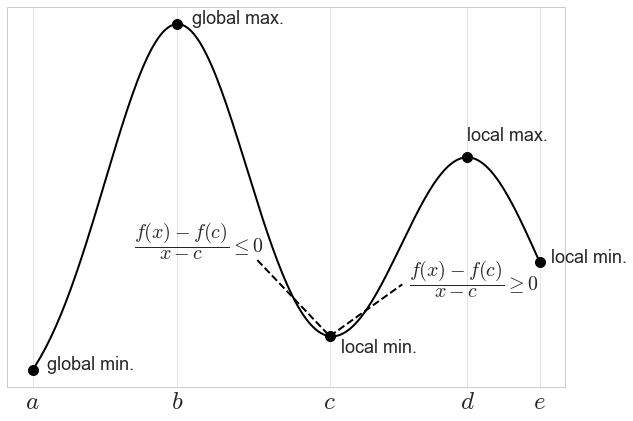

In [11]:
x = np.linspace(-3, 4, 200)
mu_c = 0.4

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
# ax.set_xlabel('$x$', fontsize=25)
# ax.set_ylabel('$y$', fontsize=25)

y = X_marginal(x)
ax.plot(x, y, color='k')

x_ticks = (-3, -1, 1+(1/4)*np.log(6/4), 3, 4)
x_ticklabels = (r'$a$', r'$b$', r'$c$', r'$d$', r'$e$')
texts = ({'dx':0.2, 'dy':0.0, 'text':'global min.'}, {'dx':0.2, 'dy':0.0, 'text':'global max.'}, 
         {'dx':0.15, 'dy':-0.01, 'text':'local min.'}, {'dx':0.0, 'dy':0.01, 'text':'local max.'}, 
         {'dx':0.15, 'dy':0.0, 'text':'local min.'})


for i, x_tick in enumerate(x_ticks):
    ax.plot(x_tick, X_marginal(x_tick), 'o', color='k', markersize=10,)
    ax.text(x_tick+texts[i]['dx'], X_marginal(x_tick)+texts[i]['dy'], 
            texts[i]['text'], fontsize=18)
    
ax.set_yticks([])
ax.set_xticks(x_ticks)
ax.set_xticklabels( x_ticklabels, fontsize=25 )

dx = 0.5
c = x_ticks[2]
fc = X_marginal(c)
c_left = c-dx
fc_left = X_marginal(c_left)
c_right = c+dx
fc_right = X_marginal(c_right)

left_line = lambda x : fc_left + ((fc-fc_left)/(c-c_left))*(x-c_left)
right_line = lambda x : fc_right + ((fc-fc_right)/(c-c_right))*(x-c_right)
    
x_left = np.linspace(c_left-dx, c, 2)
x_right = np.linspace(c, c_right+dx, 2)
ax.plot(x_left, left_line(x_left), '--', lw=2, color='k')
ax.plot(x_right, right_line(x_right), '--', lw=2, color='k')

ax.text(-1.6, 0.103, r"$\dfrac{f(x)-f(c)}{x-c} \leq 0$", fontsize=20)
ax.text(2.2, 0.08, r"$\dfrac{f(x)-f(c)}{x-c} \geq 0$", fontsize=20)

plt.show()


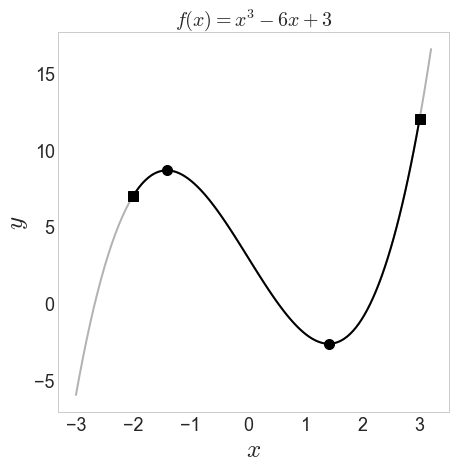

In [12]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

x_ = np.linspace(-3, 3.2, 100)
x = np.linspace(-2, 3, 100)

f = lambda x : x**3 - 6*x + 3

ax.plot(x_, f(x_), color='k', alpha=0.3)
ax.plot(x, f(x), color='k')
ax.plot(np.sqrt(2), 3-4*np.sqrt(2), 'o', markersize=10, color='k', label='local min.')
ax.plot(-np.sqrt(2), 3+4*np.sqrt(2), 'o', markersize=10, color='k', label='local max.')
ax.plot(-2, 7, "s", markersize=10, color='k')
ax.plot(3, 12, "s", markersize=10, color='k')
ax.set_title(r"$f(x)=x^3 - 6x +3$", fontsize=20)

plt.show()

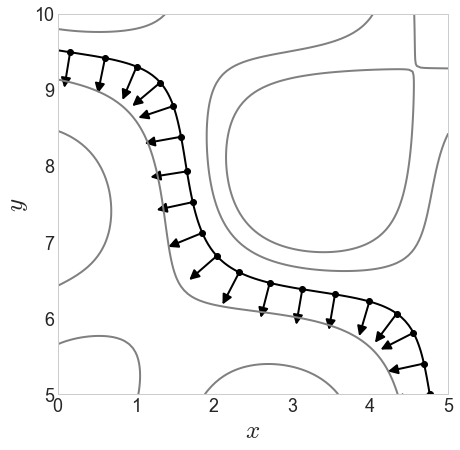

In [13]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

f = lambda x, y: -(x+y) / (2+np.cos(x)*np.sin(y))+12
dx = lambda x, y: - (2+np.cos(x)*np.sin(y)+(x+y)*(np.sin(y)*np.sin(x))) / (2+np.cos(x)*np.sin(y))**2
dy = lambda x, y: - (2+np.cos(x)*np.sin(y)-(x+y)*(np.cos(y)*np.cos(x))) / (2+np.cos(x)*np.sin(y))**2

x = np.linspace(0, 5, 100)
y = np.linspace(5, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

contours = ax.contour(X, Y, Z, levels=[5, 6, 7, 8, 9], colors=['gray', 'gray', 'k'])
paths = contours.collections[2].get_paths()
ax.plot(paths[0].vertices[::10,0], paths[0].vertices[::10,1], 'o', color='k' )
paths=contours.collections[2].get_paths()

for v in paths[0].vertices[::10]:
    c = np.array([dx(*v), dy(*v)])
    c = c / np.linalg.norm(c)*(1/2)
    arrow = FancyArrowPatch(v, v+c, lw=2, color='k',
                   mutation_scale=20, arrowstyle="-|>" )
    ax.add_artist(arrow)
    
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_2276/774203069.py:11: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


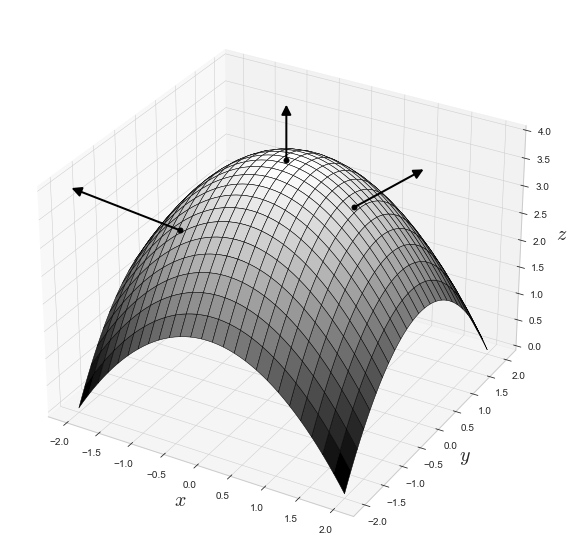

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

x1 = np.linspace(-2, 2, 51)
x2 = np.linspace(-2, 2, 51)
X1, X2 = np.meshgrid(x1, x2)

Z = lambda x, y: - (1/2)*x**2 - (1/2)*y**2 + 4
C = lambda x, y: np.array([-x, -y, -1])

ax.plot_surface(X1, X2, Z(X1, X2), cmap=plt.cm.gray, edgecolor='k')

ps = ((1, 0), (-1, -1), (0, 0))
for p in ps:
    z = Z(*p)
    c = C(*p)
    c_norm = c / 1
    P = np.array([*p, z])
    Q = P-c_norm
    ax.plot3D([P[0]], [P[1]], [P[2]] , 'o', markersize=5, color='k')
    arrow = Arrow3D([P[0], Q[0]], [P[1], Q[1]], [P[2], Q[2]], lw=2, color='k',
                   mutation_scale=20, arrowstyle="-|>", zorder=10 )
    ax.add_artist(arrow)

ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_2276/774203069.py:11: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


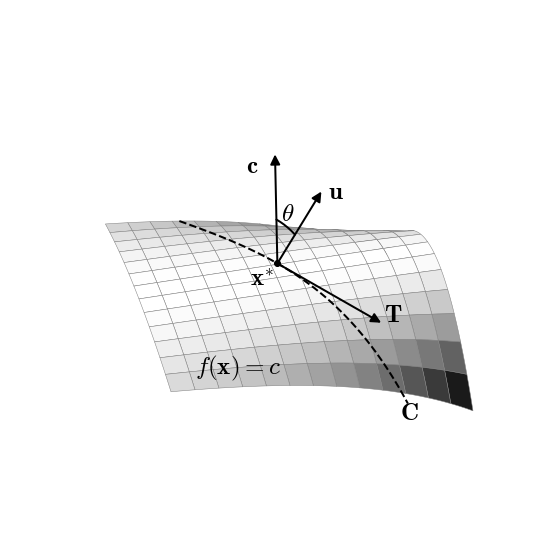

In [15]:
# 데이터 준비
x1 = x2 = np.arange(-1.0, 1.0, 0.05)
X1, X2 = np.meshgrid(x1, x2)
Z = -(1/3)*(X1**2)*(np.exp(X2))

# 곡선 C에 대한 파라메트릭 변수 s, 곡선 그리기 용
s = np.linspace(-0.5, 0.5, 100)
S = np.array([2*s, s])

# 파라메트릭 변수 구간을 10개정도로 다시 잘라서 그림 그리기 위해 씀
s2 = np.linspace(-0.5, 0.5, 10)
S2 = np.array([2*s2, s2])

s_idx = 4

C  = -(1/3)*(S[0,:]**2)*(np.exp(S[1,:]))
C2 = -(1/3)*(S2[0,:]**2)*(np.exp(S2[1,:]))
Txds = np.ones_like(s2)*2
Tyds = np.ones_like(s2)
Tzds = -(4/3)*(2*s2*np.exp(s2) + (s2**2)*np.exp(s2))
T = np.array([Txds[s_idx], Tyds[s_idx], Tzds[s_idx]])
T = T / np.linalg.norm(T)

# f(x,y,z) = (1/3)*x^2 * e^y + z의 경사도 벡터 
cx = (2/3)*S2[0,s_idx]*np.exp(S2[1,s_idx])
cy = (1/3)*(S2[0,s_idx]**2)*np.exp(S2[1,s_idx])
cz = 1
c = np.array([cx, cy, cz])
c = c / np.linalg.norm(c)

# 회전축
r = np.cross(c, T)
r = r / np.linalg.norm(r)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# 곡면그리기
ax.plot_surface(X1, X2, Z, rstride=3, cstride=3, cmap=plt.cm.gray, edgecolor='gray', zorder=1)

# 곡면 위를 지나는 곡선
ax.plot3D(S[0,:], S[1,:], C, '--', lw=2, color='k', zorder=10)

# 그 곡선위의 한점 빨간점
x_star = np.array([S2[0,s_idx], S2[1,s_idx], C2[s_idx]])
ax.plot3D([x_star[0]], [x_star[1]], [x_star[2]], 'o', color='k', zorder=10)

# 접선 벡터
tangent = Arrow3D([x_star[0], x_star[0]+T[0]], [x_star[1], x_star[1]+T[1]], [x_star[2], x_star[2]+T[2]], 
                  lw=2, color='k', mutation_scale=20, arrowstyle="-|>", zorder=10 )
ax.add_artist(tangent)

# 법선 벡터
normal = Arrow3D([x_star[0], x_star[0]+c[0]], [x_star[1], x_star[1]+c[1]], [x_star[2], x_star[2]+c[2]], 
                 lw=2, color='k', mutation_scale=20, arrowstyle="-|>", zorder=10 )
ax.add_artist(normal)

# 법선과 접선벡터를 더한다.
u = (1/2)*T + c
u = u / np.linalg.norm(u)
u_vec = Arrow3D([x_star[0], x_star[0]+u[0]], [x_star[1], x_star[1]+u[1]], [x_star[2], x_star[2]+u[2]], lw=2, color='k',
             mutation_scale=20, arrowstyle="-|>", zorder=10 )
ax.add_artist(u_vec)
# ax.plot3D([x_star[0]+u[0]], [x_star[1]+u[1]], [x_star[2]+u[2]], 'o', color='r', zorder=10)

# c, u 사이각
theta = np.arccos(np.dot(c, u))
rot = theta / 5
rx, ry, rz = [], [], []

for i in range(5+1):
    # 회전행렬: https://en.wikipedia.org/wiki/Rotation_matrix#Rotation_matrix_from_axis_and_angle
    rot1 = rot*i
    R = np.array([ [ np.cos(rot1) + (r[0]**2)*(1-np.cos(rot1)), r[0]*r[1]*(1-np.cos(rot1)) - r[2]*np.sin(rot1), r[0]*r[2]*(1-np.cos(rot1)) + r[1]*np.sin(rot1) ],
                   [ r[1]*r[0]*(1-np.cos(rot1)) + r[2]*np.sin(rot1), np.cos(rot1) + (r[1]**2)*(1-np.cos(rot1)), r[1]*r[2]*(1-np.cos(rot1)) - r[0]*np.sin(rot1) ],
                   [ r[2]*r[0]*(1-np.cos(rot1)) - r[1]*np.sin(rot1), r[2]*r[1]*(1-np.cos(rot1)) + r[0]*np.sin(rot1), np.cos(rot1) + (r[2]**2)*(1-np.cos(rot1)) ] ])

    u2 = np.dot(R, c*0.4)
    rx.append(x_star[0]+u2[0])
    ry.append(x_star[1]+u2[1])
    rz.append(x_star[2]+u2[2])

ax.plot3D(rx, ry, rz, color='k', zorder=10)

# 텍스트 
ax.text(1.0, 0.45, -0.7, r'$\mathbf{C}$', color='k', fontsize=25)
ax.text(0.7, 0.42,  0.0, r'$\mathbf{T}$', color='k', fontsize=25)
ax.text(S2[0,5]-0.01, S2[1,2]-0.01, 0.0, r'$\mathbf{x}^{*}$', color='k', fontsize=25)
ax.text(S2[0,4], S2[1,4]-0.2, 0.9,  r'$\mathbf{c}$',   color='k', fontsize=25)
ax.text(u[0], u[1]-0.05, u[2], r'$\mathbf{u}$', color='k', fontsize=25)
ax.text(-0.05, -0.05, 0.45, r'$\theta$', color='k', fontsize=25)
ax.text(0.5, -0.75, -0.4, r'$f(\mathbf{x})=c$', color='k', fontsize=25)

ax.set_zlim(-1,1)
ax.set_axis_off()
ax.view_init(35, -15)

plt.show()

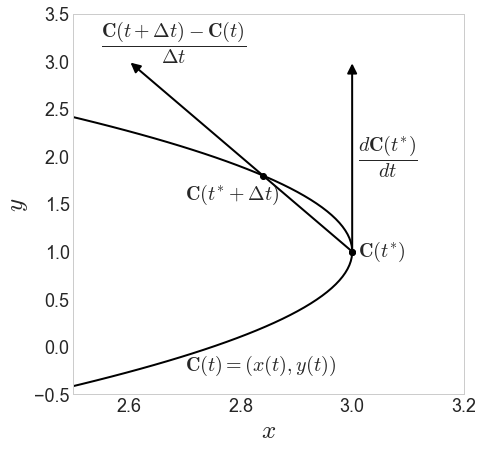

In [16]:
t = np.linspace(-1, 1, 100)
x = lambda t: -t**2 + 3
y = lambda t: 2*t+1

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

t_star = 0
dts = [0.4,  0.0001]

ax.plot(x(t), y(t), color='k')
ax.plot(x(t_star), y(t_star), 'o', color='k', )


for dt in dts :
    ax.plot(x(t_star+dt), y(t_star+dt), 'o', color='k', )

    t_star_vec = np.array([x(t_star), y(t_star)])
    t_star_plus_dt_vec = np.array([x(t_star+dt), y(t_star+dt)])
    dt = (t_star_plus_dt_vec - t_star_vec) / dt

    arrow = FancyArrowPatch(t_star_vec, t_star_vec+dt, lw=2, color='k',
                       mutation_scale=20, arrowstyle="-|>" )
    ax.add_artist(arrow)

ax.text(2.7, 1.6, '$\mathbf{C}(t^{*} + \Delta t)$', va='center', fontsize=20)
ax.text(3.01, 1, '$\mathbf{C}(t^{*})$', va='center', fontsize=20)
ax.text(3.01, 2, '$\dfrac{d\mathbf{C}(t^{*})}{dt}$', va='center', fontsize=20)
ax.text(2.55, 3.2, '$\dfrac{\mathbf{C}(t+\Delta t)-\mathbf{C}(t)}{\Delta t}$', va='center', fontsize=20)
ax.text(2.7, -0.2, '$\mathbf{C}(t)=(x(t),y(t))$', va='center', fontsize=20)
#arrowed_spines(fig, ax)
ax.set_xlim(2.5, 3.2)
ax.set_ylim(-0.5, 3.5)

plt.show()

In [17]:
import sympy as sp

In [18]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')

f = -sp.Rational(1, 3) * x1**2 * sp.E**x2

sp.derive_by_array(sp.derive_by_array(f, (x1, x2)), (x1, x2))

[[-2*exp(x2)/3, -2*x1*exp(x2)/3], [-2*x1*exp(x2)/3, -x1**2*exp(x2)/3]]

In [19]:
H = sp.derive_by_array(sp.derive_by_array(f, (x1, x2)), (x1, x2))

H.subs({x1:2, x2:0})

[[-2/3, -4/3], [-4/3, -4/3]]

In [20]:
x = sp.Symbol('x')
y = sp.Symbol('y')

f = 50*(y-x**2)**2 + (2-x)**2

c = sp.derive_by_array(f, (x, y))
Hf = sp.derive_by_array(c, (x, y))

In [21]:
c

[-200*x*(-x**2 + y) + 2*x - 4, -100*x**2 + 100*y]

In [22]:
Hf

[[600*x**2 - 200*y + 2, -200*x], [-200*x, 100]]

In [23]:
first_ncs_sol = sp.solve(c)

In [24]:
first_ncs_sol 

[{x: 2, y: 4}]

In [25]:
H = Hf.subs({x:first_ncs_sol[0][x], y:first_ncs_sol[0][y]})

In [26]:
H

[[1602, -400], [-400, 100]]

In [27]:
H = np.array(H).astype(np.float64).reshape(2,2)

In [28]:
H

array([[1602., -400.],
       [-400.,  100.]])

In [29]:
lamda, _ = np.linalg.eig(H)

lamda

array([1.7019e+03, 1.1752e-01])

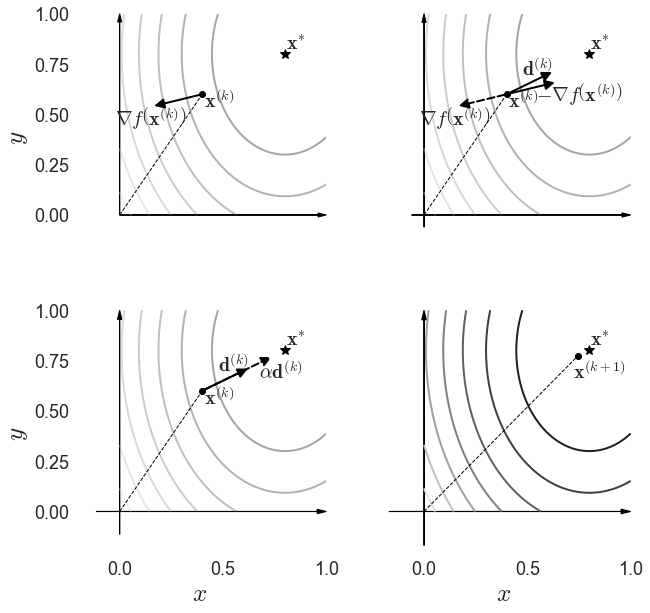

In [30]:
fig, ax = plt.subplots(2, 2, sharex='all', sharey='all')
fig.set_size_inches((10,10))

ax1 = ax[0,0]; ax2 = ax[0,1]; ax3 = ax[1,0]; ax4 = ax[1,1];

f = lambda x, y : 2*(x-0.8)**2 + (y-0.8)**2
def grad(x, y):
    return np.array([4*(x-0.8), 2*(y-0.8)])

x = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, x)
Z = f(X, Y)

x_star = np.array([0.8, 0.8])
x_k = np.array([0.4, 0.6])
c = grad(*x_k)
c = c / np.linalg.norm(c)/4

d = (x_star - x_k)/1.75

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)

ax3.xaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)
ax3.set_xlabel('$x$', fontsize=25)
ax3.set_ylabel('$y$', fontsize=25)
ax3.grid(False)

ax4.xaxis.set_tick_params(labelsize=18)
ax4.yaxis.set_tick_params(labelsize=18)
ax4.set_xlabel('$x$', fontsize=25)
ax4.set_ylabel('$y$', fontsize=25)
ax4.grid(False)


ax1.contour(X, Y, Z, cmap=plt.cm.gray, alpha=0.4)
ax1.plot(*x_k, 'o', color='k', zorder=10)
ax1.plot(*x_star, '*', color='k',  markersize=10, zorder=10)
ax1.plot([0, x_k[0]],[0, x_k[1]], color='k', ls='--', lw=1)
arrow = FancyArrowPatch(x_k, x_k+c, lw=2, color='k',
                       mutation_scale=20, arrowstyle="-|>", zorder=10 )
ax1.add_artist(arrow)
ax1.text(0.48, 0.57, r'$\mathbf{x}^{(k)}$', ha='center', va='center', fontsize=20)    
ax1.text(0.15, 0.48, r'$\nabla f\left(\mathbf{x}^{(k)}\right)$', ha='center', va='center', fontsize=20) 
ax1.text(0.85, 0.85, r'$\mathbf{x}^{*}$', ha='center', va='center', fontsize=20) 
######################################################################################################

ax2.contour(X, Y, Z, cmap=plt.cm.gray, alpha=0.4)
ax2.plot(*x_k, 'o', color='k', zorder=10)
ax2.plot(*x_star, '*', color='k', markersize=10, zorder=10)
ax2.plot([0, x_k[0]],[0, x_k[1]], color='k', ls='--', lw=1)
arrow1 = FancyArrowPatch(x_k, x_k+c, lw=2, color='k', ls='--',
                       mutation_scale=20, arrowstyle="-|>", zorder=10 )
ax2.add_artist(arrow1)

arrow2 = FancyArrowPatch(x_k, x_k-c, lw=2, color='k', 
                       mutation_scale=20, arrowstyle="-|>", zorder=10 )
ax2.add_artist(arrow2)

arrow3 = FancyArrowPatch(x_k, x_k+d, lw=2, color='k', 
                       mutation_scale=20, arrowstyle="-|>", zorder=10 )
ax2.add_artist(arrow3)

ax2.text(0.48, 0.57, r'$\mathbf{x}^{(k)}$', ha='center', va='center', fontsize=20)    
ax2.text(0.15, 0.48, r'$\nabla f\left(\mathbf{x}^{(k)}\right)$', ha='center', va='center', fontsize=20) 
ax2.text(0.75, 0.6, r'$-\nabla f\left(\mathbf{x}^{(k)}\right)$', ha='center', va='center', fontsize=20)
ax2.text(0.55, 0.73, r'$\mathbf{d}^{(k)}$', ha='center', va='center', fontsize=20)  
ax2.text(0.85, 0.85, r'$\mathbf{x}^{*}$', ha='center', va='center', fontsize=20) 
########################################################################################################

ax3.contour(X, Y, Z, cmap=plt.cm.gray, alpha=0.4)
ax3.plot(*x_k, 'o', color='k', zorder=10)
ax3.plot(*x_star, '*', color='k', markersize=10, zorder=10)
ax3.plot([0, x_k[0]],[0, x_k[1]], color='k', ls='--', lw=1)
arrow2 = FancyArrowPatch(x_k, x_k+1.5*d, lw=2, color='k', ls='--',
                       mutation_scale=20, arrowstyle="-|>", zorder=10 )
ax3.add_artist(arrow2)

arrow3 = FancyArrowPatch(x_k, x_k+d, lw=2, color='k', 
                       mutation_scale=20, arrowstyle="-|>", zorder=10 )
ax3.add_artist(arrow3)

ax3.text(0.48, 0.57, r'$\mathbf{x}^{(k)}$', ha='center', va='center', fontsize=20)    
ax3.text(0.55, 0.73, r'$\mathbf{d}^{(k)}$', ha='center', va='center', fontsize=20) 
ax3.text(0.78, 0.7, r'$\alpha \mathbf{d}^{(k)}$', ha='center', va='center', fontsize=20) 
ax3.text(0.85, 0.85, r'$\mathbf{x}^{*}$', ha='center', va='center', fontsize=20) 
########################################################################################################

ax4.contour(X, Y, Z, cmap=plt.cm.gray)
ax4.plot(*(x_k+1.5*d), 'o', color='k', zorder=10)
ax4.plot(*x_star, '*', color='k', markersize=10, zorder=10)
ax4.plot([0, (x_k+1.5*d)[0]],[0, (x_k+1.5*d)[1]], color='k', ls='--', lw=1)

ax4.text(0.85, 0.7, r'$\mathbf{x}^{(k+1)}$', ha='center', va='center', fontsize=20)  
ax4.text(0.85, 0.85, r'$\mathbf{x}^{*}$', ha='center', va='center', fontsize=20) 

arrowed_spines(fig, ax1)
arrowed_spines(fig, ax2)
arrowed_spines(fig, ax3)
arrowed_spines(fig, ax4)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax_ in ax.flat:
    ax_.label_outer()
    
plt.subplots_adjust(hspace=0.2, wspace=0.2)

plt.show()

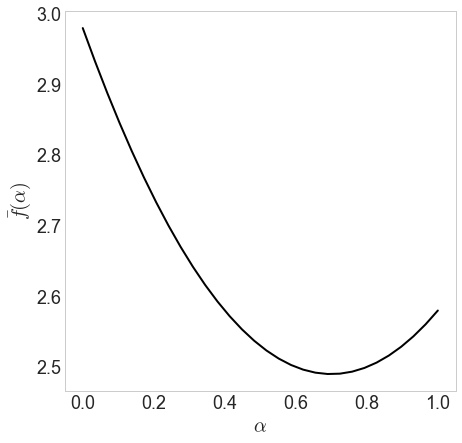

In [31]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1,1,1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)
ax.grid(False)

def f(X):
    return X[0]**2 + X[1]**2 + 2

x_0 = np.array([0.7, 0.7])
d = np.array([-1, 0])

def f_alpha(a):
    return f(x_0.reshape(2,1) + a*d.reshape(2,1))  

alphas = np.linspace(0, 1, 30)
ax.plot(alphas, f_alpha(alphas), 'k')
ax.set_xlabel(r'$\alpha$', fontsize=20)
ax.set_ylabel(r'$\bar{f}(\alpha)$', fontsize=20)

plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_2276/774203069.py:11: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


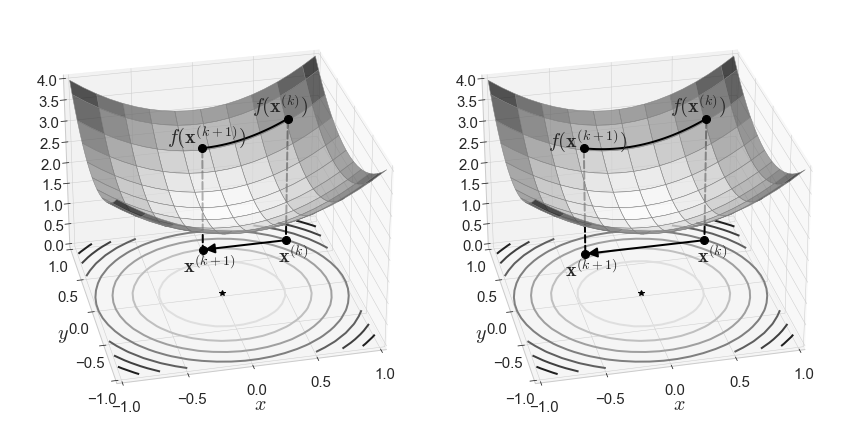

In [32]:
# 강 울프 조건을 사용하는 선탐색 함수
from scipy.optimize.linesearch import line_search

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122, projection="3d")

# 강 울프 조건에서 곡률 조건 
# 보통 0.1~0.9사이로 두며 작을 수록 선 탐색을 정확하게 함
c2 = [0.1, 0.9]

def f(X):
    return X[0]**2 + X[1]**2 + 2

def df(X):
        return np.array([2*X[0], 2*X[1]])

def f_alpha(a, x0, d):
    return f(x0+a*d) #2,30 

x = np.linspace(-1,1,20) 
X, Y = np.meshgrid(x,x)
    
x_0 = np.array([0.7, 0.7])
d = np.array([-1, 0])
    
for i, ax in enumerate([ax1, ax2]):
    # alpha, fc, gc, new_fval, old_fval, new_slop
    ret = line_search(f, df, x_0, d, c2=c2[i])
    alpha = ret[0]
    x_1 = x_0 + alpha*d

    alphas = np.linspace(0, alpha, 30)
    x_path = np.linspace(x_0[0], x_1[0], 30)
    f_path = f_alpha(alphas, x_0.reshape(2,1), d.reshape(2,1))

    ax.plot_surface(X, Y, f(np.array([X,Y])), rstride=2, cstride=2, cmap=plt.cm.binary, edgecolor='gray', alpha=0.7)
    ax.plot3D([x_0[0]], [x_0[1]], f(x_0), 'o', markersize=8, color='k', zorder=20)
    ax.plot3D([x_0[0]], [x_0[1]], 0, 'o', markersize=8, color='k', zorder=20)
    ax.plot3D([x_1[0]], [x_1[1]], f(x_1), 'o', markersize=8, color='k', zorder=20)
    ax.plot3D([x_1[0]], [x_1[1]], 0, 'o', markersize=8, color='k', zorder=20)
    ax.plot3D([0], [0], [0], '*', color='k', zorder=20)
    ax.contour(X, Y, f(np.array([X,Y])), cmap=plt.cm.binary, linestyles="solid", offset=0)

    ax.plot3D(x_path, np.ones(x_path.shape[0])*x_0[1], f_path, color='k', zorder=20)

    p_vec = Arrow3D([x_0[0], x_1[0]], [x_0[1], x_1[1]], [0, 0], lw=2, color='k',
                 mutation_scale=20, arrowstyle="-|>", zorder=10 )
    ax.add_artist(p_vec)

    v_vec1 = Arrow3D([x_0[0], x_0[0]], [x_0[1], x_0[1]], [f(x_0), 0], lw=2, ls='--', color='k',
                 mutation_scale=20, arrowstyle="-", zorder=10 )
    ax.add_artist(v_vec1)

    v_vec2 = Arrow3D([x_1[0], x_1[0]], [x_1[1], x_1[1]], [f(x_1), 0], lw=2, ls='--', color='k',
                 mutation_scale=20, arrowstyle="-", zorder=10 )
    ax.add_artist(v_vec2)

    ax.text(x_0[0], x_0[1]-0.25, 0, r'$\mathbf{x}^{(k)}$', ha='center', va='center', zorder=20, fontsize=20)
    ax.text(x_0[0], x_0[1]+0.25, f(x_0), r'$f(\mathbf{x}^{(k)})$', ha='center', va='center', zorder=20, fontsize=20)
    ax.text(x_1[0], x_1[1]-0.25, 0, r'$\mathbf{x}^{(k+1)}$', ha='center', va='center', zorder=20, fontsize=20)
    ax.text(x_1[0], x_1[1]-0.15, f(x_0), r'$f(\mathbf{x}^{(k+1)})$', ha='center', va='center', zorder=20, fontsize=20)
    
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.zaxis.set_tick_params(labelsize=15)
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$y$', fontsize=20)
    ax.set_xticks([-1, -0.5, 0.0, 0.5, 1.0])
    ax.set_yticks([-1, -0.5, 0.0, 0.5, 1.0])
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.view_init(29, -103)

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

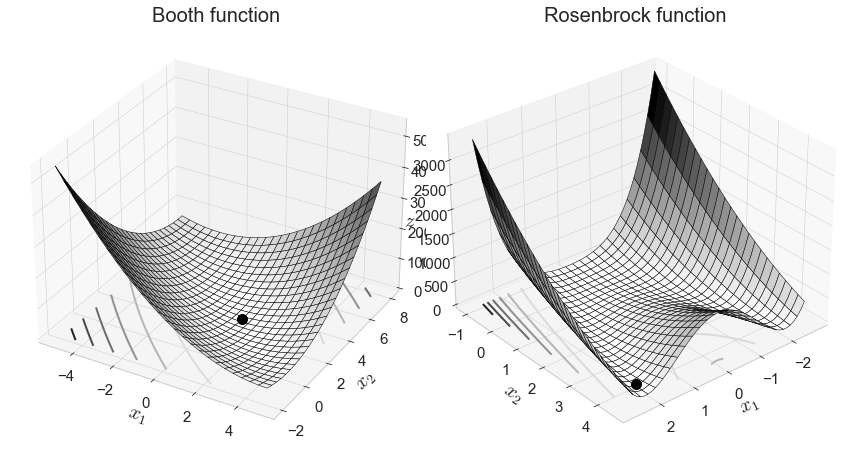

In [33]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122, projection="3d")

def f1(X):
    return (X[0]+2*X[1]-7)**2 + (2*X[0]+X[1]-5)**2 

def df1(X):
    dx0 = 2*(X[0]+2*X[1]-7)+4*(2*X[0]+X[1]-5)
    dx1 = 4*(X[0]+2*X[1]-7)+2*(2*X[0]+X[1]-5)
    return np.array([dx0, dx1])
    
def f2(X):
    """
    x    : (2,)인 2차원 ndarray 변수
    -----------------------------------------
    반환 : 로젠브록 함수값
    """
    return 50*(X[1]-X[0]**2)**2 + (2-X[0])**2

def df2(X):
    """
    x    : (2,)인 2차원 ndarray 변수
    -----------------------------------------
    반환 : 로젠브록 함수의 도함수 값
    """
    dx0 = -200*X[0]*(X[1]-X[0]**2)-2*(2-X[0])
    dx1 = 100*(X[1]-X[0]**2)
    return np.array([dx0, dx1])

x1 = np.linspace(-5, 5, 51)
x2 = np.linspace(-2, 8, 51)
X1, X2 = np.meshgrid(x1, x2)

ax1.plot_surface(X1, X2, f1(np.array([X1,X2])), cmap=plt.cm.binary, edgecolor="k")
ax1.contour(X1, X2, f1(np.array([X1,X2])), cmap=plt.cm.binary, linestyles="solid", offset=0)
ax1.plot3D([1], [3], f1([1,3]), 'o', color='k', markersize=10, zorder=20)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.zaxis.set_tick_params(labelsize=15)
ax1.set_xlabel(r'$x_1$', fontsize=20)
ax1.set_ylabel(r'$x_2$', fontsize=20)
ax1.set_zlabel(r'$z$', fontsize=20)
ax1.set_title('Booth function', fontsize=20)

x1 = np.linspace(-2.7, 2.7, 51)
x2 = np.linspace(-1, 4.5, 51)
X1, X2 = np.meshgrid(x1, x2)

ax2.plot_surface(X1, X2, f2([X1, X2]), cmap=plt.cm.binary, edgecolor="k")
ax2.contour(X1, X2, f2(np.array([X1,X2])), cmap=plt.cm.binary, linestyles="solid", offset=0)
ax2.plot3D([2], [4], f2([2,4]), 'o', color='k', markersize=10, zorder=20)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.zaxis.set_tick_params(labelsize=15)
ax2.set_xlabel(r'$x_1$', fontsize=20)
ax2.set_ylabel(r'$x_2$', fontsize=20)
ax2.set_zlabel(r'$z$', fontsize=20)
ax2.set_title('Rosenbrock function', fontsize=20)
ax2.view_init(30, 50)

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

In [34]:
from scipy.optimize import line_search

# 1. 초기화: 시작점 x^(0)를 선정
x = np.array([0, 4.5])

# 수렴 상수 ϵ 설정
def SDM(f, df, x, eps=1.0e-7, callback=None):
    max_iter = 10000
    
    # 반복 횟수 k=0으로 설정
    for k in range(max_iter):
        # 2. 경사도벡터 계산: c^(k) = ∇f(x^(k))를 계산
        c = df(x)

        # 3. 수렴판정: c^(k)<ϵ이면 x^*=x^(k)로 두고 정지, 아니면 단계를 계속 진행
        if np.linalg.norm(c) < eps :
            print("Stop criterion break Iter.: {:5d}, x: {}".format(k, x))
            break

        # 3. 강하방향 설정: d^(k)=-c^(k)
        d = -c 

        # 4. 이동거리 계산: d^(k)를 따라 f(α)=f(x^(k)+α*d^(k))를 최소화하는 α_k를 계산
        alpha = line_search(f, df, x, d)[0]
        # alpha = golden(f_alpha, args=(f, x, d))
            
        # 5. 업데이트: x^(k+1)=(x^(k)+α_k*d^(k)로 변수를 업데이트하고 
        #              k=k+1로 두고 2로 가서 반복
        x = x + alpha * d
        
        # 외부함수를 실행 알고리즘과는 상관없고 사용자에 따라
        # 실행하고 싶은 작업이 있으면 callback함수로 실행시키기 위함
        if callback :
            callback(x)    
    else:
        print("Stop max iter:{:5d} x:{}".format(k, x))

SDM(f1, df1, x)  

Stop criterion break Iter.:    61, x: [1. 3.]


In [35]:
x = np.array([-1, 2])

SDM(f2, df2, x) 

Stop max iter: 9999 x:[1.9743 3.8977]


Stop criterion break Iter.:    61, x: [1. 3.]


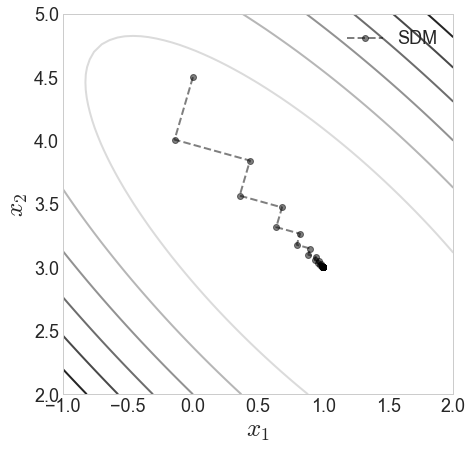

In [36]:
x = np.array([0, 4.5])

# 반복 히스토리를 저장할 전역변수와 콜백함수
sdm_path = [x, ]
def record_sdm(xk) :
    global sdm_path
    sdm_path.append(xk)    

SDM(f1, df1, x, callback=record_sdm)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1,1,1)

sdm_path = np.array(sdm_path)

x1 = np.linspace(-1, 2, 51)
x2 = np.linspace(2, 5, 51)
X1, X2 = np.meshgrid(x1, x2)

ax.contour(X1, X2, f1(np.array([X1,X2])), cmap=plt.cm.binary, linestyles="solid")
ax.plot(sdm_path[:,0], sdm_path[:,1], 'o--', alpha=0.5, color='k', label='SDM')
ax.legend(fontsize=18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x_1$', fontsize=25)
ax.set_ylabel(r'$x_2$', fontsize=25)
ax.grid(False)

plt.show()

In [37]:
# 1. 초기화: 시작점 x^(0)를 선정
x = np.array([0, 4.5])

def CGM(f, df, x, eps=1.0e-7, callback=None):
    max_iter = 10000
    
    # 반복 횟수 k=0으로 설정
    for k in range(max_iter):
        # 2. 경사도벡터 계산: c^(k) = ∇f(x^(k))를 계산
        c = df(x)

        # 3. 수렴판정: c^(k)<ϵ이면 x^*=x^(k)로 두고 정지, 아니면 단계를 계속 진행
        if np.linalg.norm(c) < eps :
            print("Stop criterion break Iter: {:5d}, x: {}".format(k, x))
            break

        # 4. 강하방향 설정: d^(k)=-c^(k) 또는 d^(k)=-c^(k)+ β_k*d^(k-1)
        if k == 0 :
            d = -c
        else:
            # F & R
            beta = (np.linalg.norm(c) / np.linalg.norm(c_old))**2
            # P * R
            # beta = (np.dot(c, c-c_old)) / np.linalg.norm(c_old)**2
            
            d = -c + beta*d

        # 5. 이동거리 계산: d^(k)를 따라 f(α)=f(x^(k)+α*d^(k))를 최소화하는 α_k를 계산
        alpha = line_search(f, df, x, d, c2=0.1)[0]
    
        
        # 6. 업데이트: x^(k+1)=(x^(k)+α_k*d^(k)로 변수를 업데이트하고 
        #             k=k+1로 두고 2로 가서 반복
        x = x + alpha * d

        # 7. 현재 정보 저장
        c_old = c.copy()
        
        # 외부함수를 실행 알고리즘과는 상관없고 사용자에 따라
        # 실행하고 싶은 작업이 있으면 callback함수로 실행시키기 위함
        if callback :
            callback(x)    

    else:
        print("Stop max iter:{:5d} x:{}".format(k, x)) 

CGM(f1, df1, x)

Stop criterion break Iter:     2, x: [1. 3.]


In [38]:
x = np.array([0, 4.5])

# 반복 히스토리를 저장할 전역변수와 콜백함수
cgm_path = [x, ]
def record_cgm(xk) :
    global cgm_path
    cgm_path.append(xk)

CGM(f1, df1, x, callback=record_cgm)

Stop criterion break Iter:     2, x: [1. 3.]


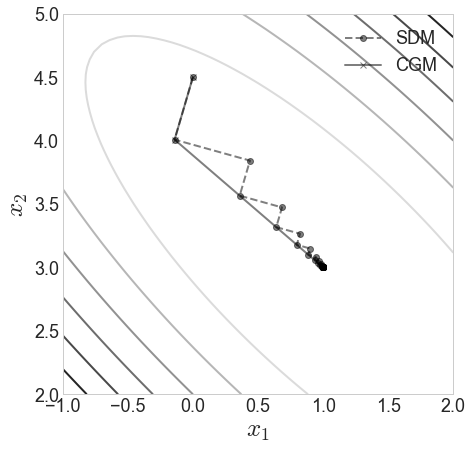

In [39]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1,1,1)

sdm_path = np.array(sdm_path)
cgm_path = np.array(cgm_path)

x1 = np.linspace(-1, 2, 51)
x2 = np.linspace(2, 5, 51)
X1, X2 = np.meshgrid(x1, x2)

ax.contour(X1, X2, f1(np.array([X1,X2])), cmap=plt.cm.binary, linestyles="solid")
ax.plot(sdm_path[:,0], sdm_path[:,1], 'o--', alpha=0.5, color='k', label='SDM')
ax.plot(cgm_path[:,0], cgm_path[:,1], 'x-', alpha=0.5, color='k', label='CGM')
ax.legend(fontsize=18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x_1$', fontsize=25)
ax.set_ylabel(r'$x_2$', fontsize=25)
ax.grid(False)

plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 183
         Gradient evaluations: 61
[2. 4.]
Stop criterion break Iter:    51, x: [2. 4.]


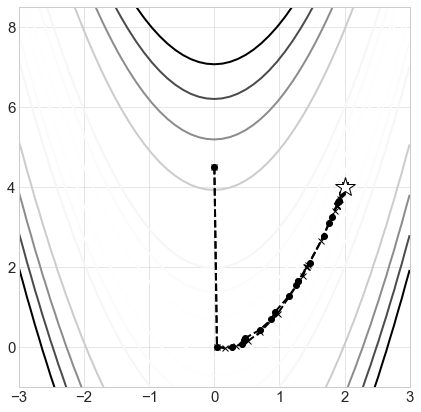

In [40]:
from scipy import optimize

# 반복 히스토리를 저장할 전역변수와 콜백함수
scipy_path = [x, ]
def record_hist(xk) :
    global scipy_path
    scipy_path.append(xk)

cgm_path = [x, ]
def record_cgm(xk) :
    global cgm_path
    cgm_path.append(xk)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html
result_scipy = optimize.fmin_cg(f2, x, callback=record_hist)
print(result_scipy)
scipy_path = np.asarray(scipy_path)

CGM(f2, df2, x, callback=record_cgm)
cgm_path = np.asarray(cgm_path)

x1 = np.linspace(-3, 3, 51)
x2 = np.linspace(-1, 8.5, 51)
X1, X2 = np.meshgrid(x1, x2)

Z = f2([X1, X2])

levels1 = np.linspace(8, 20, 1)
levels2 = np.linspace(30, 100, 2)
levels3 = np.linspace(200, 2500, 5)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.contour(X1, X2, Z, levels=np.concatenate((levels1, levels2, levels3)))
ax.plot(scipy_path[:,0], scipy_path[:,1], 'o--', color='k')
ax.plot(cgm_path[:,0], cgm_path[:,1], 'x--', color='k')
ax.plot(2, 4, '*', markerfacecolor='w', markeredgecolor='k', markersize=20)
plt.show()